<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>Data Mining(Project 2)</b>
<br>
<font size=5>
<b>Exploring Zachary's Karate Club Graph
</p>
<font size=4>
Implemented By: Rozhan Vassef
<br>
<font size=4> 2024
<hr>
</div>
</font>

<h2>
<font face="B Nazanin" color="black">
Importing Required Libraries

In [7]:
# Import libraries
import numpy as np  # Fix numpy first
import networkx as nx  # Graph creation and manipulation
from node2vec import Node2Vec  # Node embeddings
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt  # Visualization

# Confirm successful import
print("Libraries imported successfully.")

Libraries imported successfully.


<h2>
<font face="B Nazanin" color="black">
Loading The Dataset

In [8]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Display graph information
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print("Node attributes:")
for node, attrs in G.nodes(data=True):
    print(f"Node {node}: {attrs}")

Graph has 34 nodes and 78 edges.
Node attributes:
Node 0: {'club': 'Mr. Hi'}
Node 1: {'club': 'Mr. Hi'}
Node 2: {'club': 'Mr. Hi'}
Node 3: {'club': 'Mr. Hi'}
Node 4: {'club': 'Mr. Hi'}
Node 5: {'club': 'Mr. Hi'}
Node 6: {'club': 'Mr. Hi'}
Node 7: {'club': 'Mr. Hi'}
Node 8: {'club': 'Mr. Hi'}
Node 9: {'club': 'Officer'}
Node 10: {'club': 'Mr. Hi'}
Node 11: {'club': 'Mr. Hi'}
Node 12: {'club': 'Mr. Hi'}
Node 13: {'club': 'Mr. Hi'}
Node 14: {'club': 'Officer'}
Node 15: {'club': 'Officer'}
Node 16: {'club': 'Mr. Hi'}
Node 17: {'club': 'Mr. Hi'}
Node 18: {'club': 'Officer'}
Node 19: {'club': 'Mr. Hi'}
Node 20: {'club': 'Officer'}
Node 21: {'club': 'Mr. Hi'}
Node 22: {'club': 'Officer'}
Node 23: {'club': 'Officer'}
Node 24: {'club': 'Officer'}
Node 25: {'club': 'Officer'}
Node 26: {'club': 'Officer'}
Node 27: {'club': 'Officer'}
Node 28: {'club': 'Officer'}
Node 29: {'club': 'Officer'}
Node 30: {'club': 'Officer'}
Node 31: {'club': 'Officer'}
Node 32: {'club': 'Officer'}
Node 33: {'club': 'O

<h2>
<font face="B Nazanin" >
<font size=4 >
<b> <font color='#eb4034'> Explanation: </font></b>
</p>
The Karate Club dataset represents the social network of a karate club at a university.
</p>
Each node (0 to 33) represents a member of the karate club.
The edges (connections between nodes) represent friendships between members.
</p>
The club later split into two factions due to a conflict between the club instructor ("Mr. Hi") and the club administrator ("Officer").
Each node is labeled as belonging to either:
"Mr. Hi" faction / "Officer" faction .
</p>
*Usages of this dataset:
</p>
1) Used in community detection: Helps understand how social groups form.
</p>
2) Benchmark for graph algorithms: Used for testing clustering and partitioning methods.
</p>
3) Real-world network analysis: Represents real social interactions.

<h2>
<font face="B Nazanin" color="black">
1.Graph Exploration

<h2>
<font face="B Nazanin" color="#0099cc">
a) Make the karate_club_graph, and display it with the nodes being colored based on their 'club' attribute.

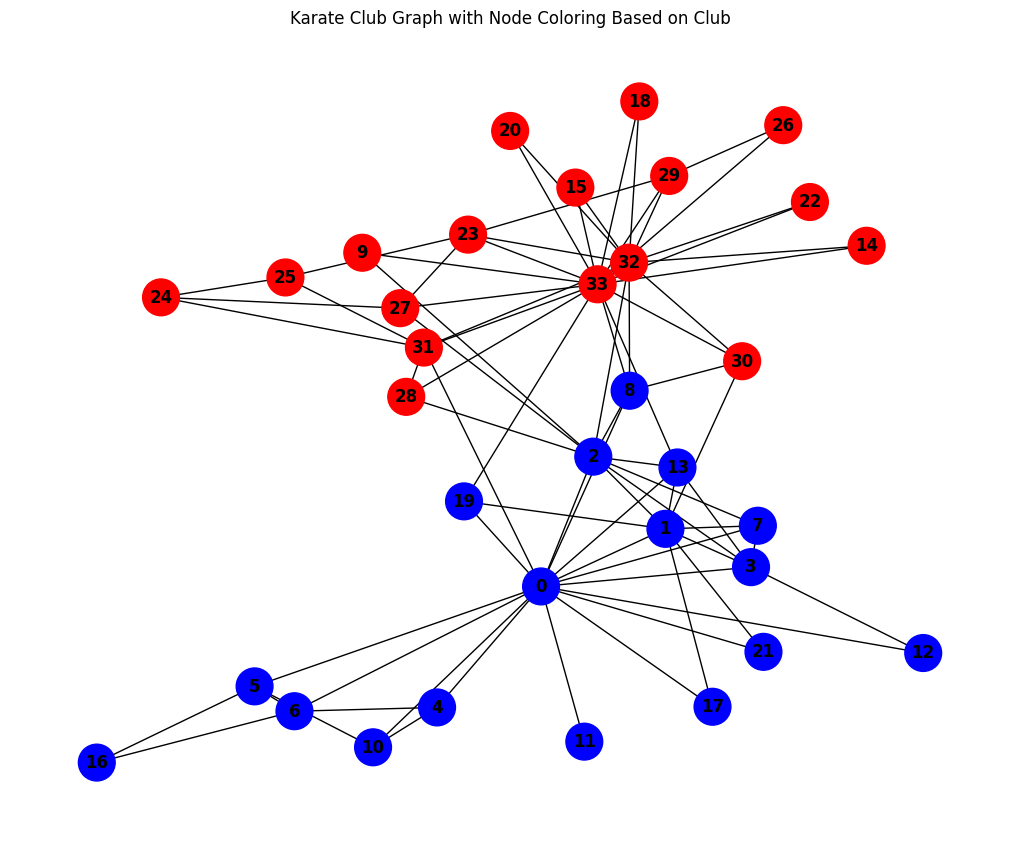

In [6]:
# Extract club labels for coloring
color_map = ['blue' if G.nodes[node]['club'] == 'Mr. Hi' else 'red' for node in G.nodes]

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G,
    with_labels=True,
    node_color=color_map,
    node_size=700,
    font_weight='bold'
)
plt.title("Karate Club Graph with Node Coloring Based on Club")
plt.show()

<h2>
<font face="B Nazanin" color="#0099cc">
b) Explore some of the characteristics of the graph(such as the number of nodes, number of edges, average degree, and clustering coefficient).

In [9]:
# Calculate graph features
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
clustering_coeff = nx.average_clustering(G)

# Display results
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Clustering Coefficient: {clustering_coeff:.2f}")

Number of Nodes: 34
Number of Edges: 78
Average Degree: 4.59
Clustering Coefficient: 0.57


<h2>
<font face="B Nazanin" color="black">
2. Vertex feature extraction and clustering

<h2>
<font face="B Nazanin" color="#0099cc">
a) Compute the embedding for each node of the graph using node2vec algorithm.

In [12]:
# Create Node2Vec model
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Fit the model and generate embeddings
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get embeddings as a dictionary
embeddings = {str(node): model.wv[str(node)] for node in G.nodes}

# Print the embeddings for each node
for node, embedding in embeddings.items():
    print(f"Node {node}: {embedding}")

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Node 0: [ 0.14638181 -0.12306855  0.17606218 -0.02885596  0.12420896 -0.06013864
 -0.0754659   0.13358805 -0.15320867 -0.19420636  0.2048419  -0.11505261
 -0.06199833  0.11049121 -0.00265056 -0.14297533 -0.04730398  0.03406511
  0.06081237  0.27896222  0.22628759 -0.0568206   0.21234304 -0.02628243
 -0.19065608  0.12223627 -0.14968243 -0.05338646 -0.00956401 -0.1282472
 -0.01635825 -0.05871189 -0.23500016 -0.10923034  0.17574388  0.05348932
 -0.03601219  0.08443342  0.34017235  0.3087354   0.1076929   0.02221891
  0.07646035 -0.10397875 -0.10083108 -0.08457074  0.15681836 -0.21724808
 -0.06821025  0.02877821  0.00855721  0.00115651  0.19515675  0.16896486
  0.25546184  0.2180568   0.09813744 -0.18685876  0.16413222 -0.12075292
  0.3224173  -0.17296058  0.03484589  0.11643974]
Node 1: [ 0.14729157 -0.06527806  0.08654711 -0.18845125  0.06616049 -0.28044
 -0.05419966  0.19802684 -0.28739217 -0.05548255  0.14691362  0.02262039
  0.04481232  0.01024789  0.10910324 -0.10003278 -0.03531948  

<h2>
<font face="B Nazanin" color="#0099cc">
b) Perform K-means clustering on the nodes of the graph.

In [13]:
from sklearn.cluster import KMeans

# Convert embeddings to array
embedding_matrix = np.array([embeddings[str(node)] for node in G.nodes])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(embedding_matrix)

# Display clustering results
print(f"Cluster Labels: {labels}")

Cluster Labels: [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


<h2>
<font face="B Nazanin" color="#0099cc">
c) Illustrate the clustering with the dimension reduction on the embeddings of each node by the t-SNE algorithm.

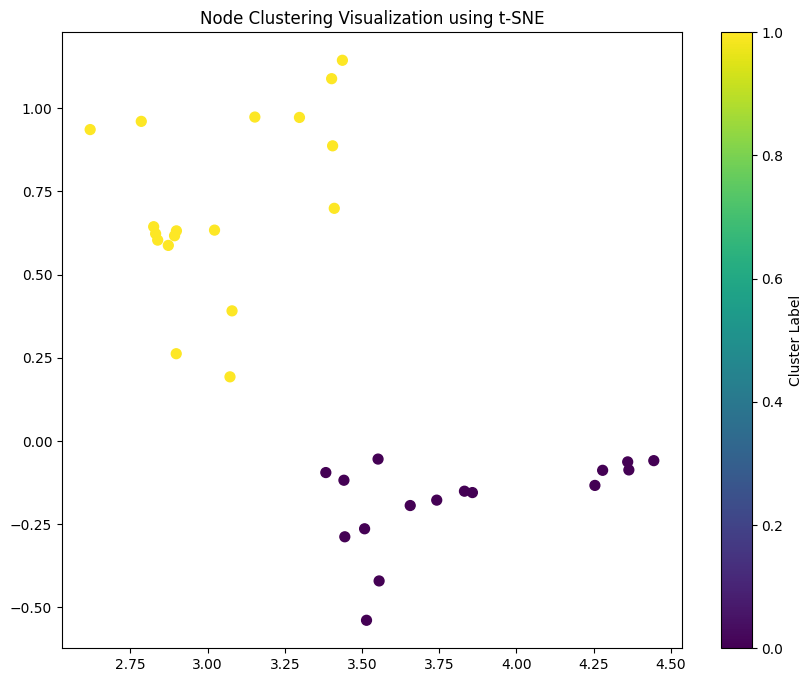

In [16]:
from sklearn.manifold import TSNE

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embedding_matrix)

# Scatter plot of reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title("Node Clustering Visualization using t-SNE")
plt.colorbar(label="Cluster Label")
plt.show()

<h2>
<font face="B Nazanin" color="#0099cc">
d) Calculate the clustering purity based on true labels(club).

In [14]:
from sklearn.metrics import accuracy_score

# Map true labels to integers
true_labels = [0 if G.nodes[node]['club'] == 'Mr. Hi' else 1 for node in G.nodes]

# Calculate purity (accuracy)
purity = accuracy_score(true_labels, labels)
print(f"Clustering Purity: {purity:.2f}")

Clustering Purity: 0.97


<h2>
<font face="B Nazanin" color="black">
3. Edge Prediction

<h2>
<font face="B Nazanin" color="#0099cc">
a) Remove 20% of the edges, and put them in the test dataset.

In [62]:
import random

# Get all edges in the graph
edges = list(G.edges())
random.shuffle(edges)

# Split 20% for testing
test_size = int(0.2 * len(edges))
test_edges = edges[:test_size]
train_edges = edges[test_size:]

# Create the training graph without test edges
G_train = G.copy()
G_train.remove_edges_from(test_edges)  # Ensure test edges are removed

print(f"Number of edges in training graph: {G_train.number_of_edges()}")
print(f"Number of edges in test dataset: {len(test_edges)}")


Number of edges in training graph: 63
Number of edges in test dataset: 15


<h2>
<font face="B Nazanin" color="#0099cc">
b) Do edge prediction on the training graph(the graph after removing the test_dataset edges) using Adamic-Adar score.

In [63]:
# Calculate Adamic-Adar scores for non-existent edges
predicted_edges = []
for u, v, score in nx.adamic_adar_index(G_train):
    predicted_edges.append((u, v, score))

# Sort edges by descending scores
predicted_edges = sorted(predicted_edges, key=lambda x: x[2], reverse=True)

# Take the top N predictions (same size as test set)
top_predictions = predicted_edges[:len(test_edges)]

for prediction in top_predictions:
    print(prediction)

(0, 1, 4.997875175812234)
(2, 33, 3.508576269863534)
(1, 33, 3.074281787960283)
(0, 32, 1.8235808019670814)
(2, 31, 1.734404953781369)
(0, 33, 1.631586747071319)
(23, 24, 1.631586747071319)
(25, 27, 1.531574161186449)
(27, 32, 1.4629070417448404)
(28, 32, 1.4629070417448404)
(0, 16, 1.4426950408889634)
(23, 31, 1.344533708530089)
(31, 33, 1.344533708530089)
(25, 32, 1.2426698691192237)
(1, 3, 1.2022458674074694)


<h2>
<font face="B Nazanin" color="#0099cc">
c) Illustrate the correctness of the predicted edges by showing the main graph in a way that train_edges are gray, correctly predicted edges are green, and incorrectly predicted edges are red.

Correct edges: 3
Incorrect edges: 12


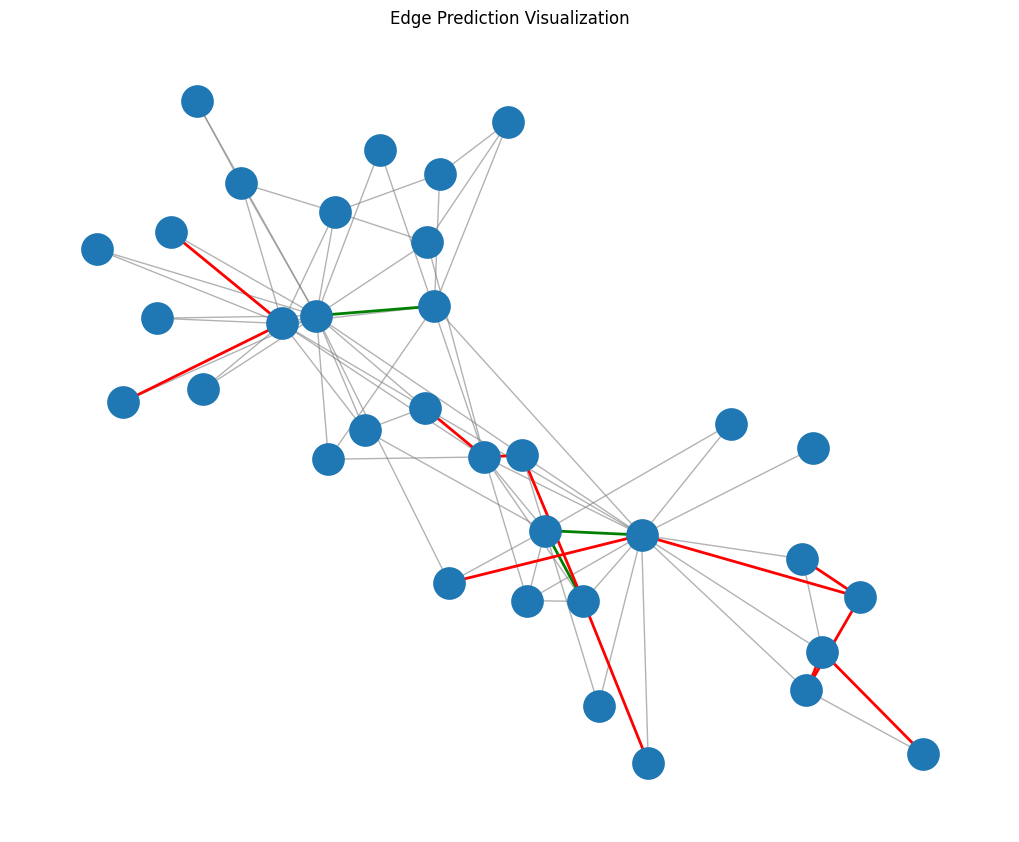

In [64]:
# Correctly predicted edges (green)
correct_edges = [
    (u, v) for u, v in test_edges
    if (u, v) in [(x, y) for x, y, _ in top_predictions] or (v, u) in [(x, y) for x, y, _ in top_predictions]
]

# Incorrectly predicted edges (red)
incorrect_edges = [
    (u, v) for u, v in test_edges
    if (u, v) not in [(x, y) for x, y, _ in top_predictions] and (v, u) not in [(x, y) for x, y, _ in top_predictions]
]

# Debugging: Print counts
print(f"Correct edges: {len(correct_edges)}")
print(f"Incorrect edges: {len(incorrect_edges)}")

# Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# Draw training edges (gray)
nx.draw(G_train, pos, edge_color='gray', with_labels=False, node_size=500, alpha=0.6)

# Draw correctly predicted edges (green)
nx.draw_networkx_edges(G, pos, edgelist=correct_edges, edge_color='green', width=2)

# Draw incorrectly predicted edges (red)
nx.draw_networkx_edges(G, pos, edgelist=incorrect_edges, edge_color='red', width=2)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)
plt.title("Edge Prediction Visualization")
plt.show()


<h2>
<font face="B Nazanin" color="#0099cc">
d) Evaluate the prediction by plotting precision-recall curve.

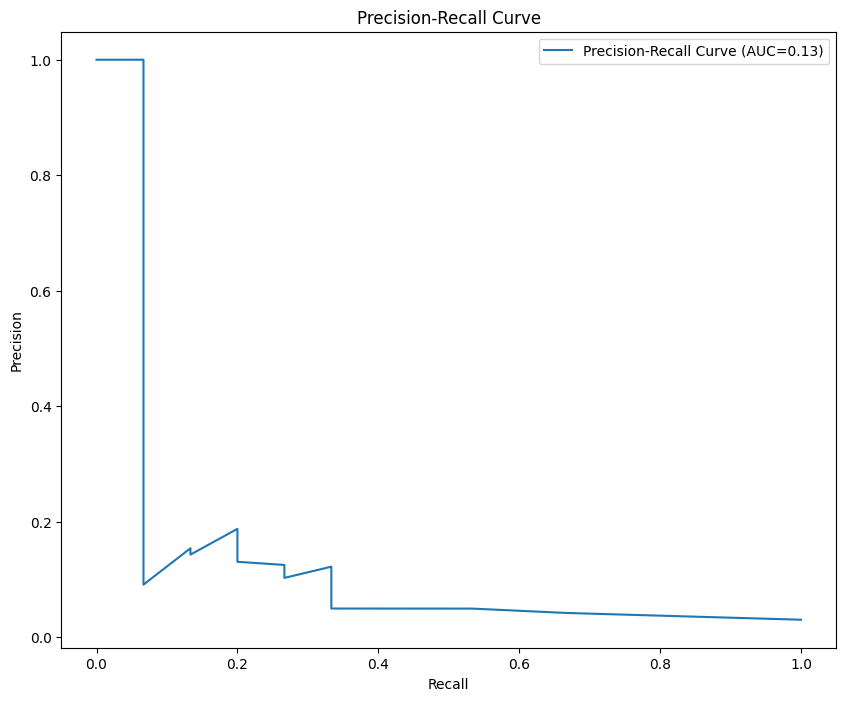

In [65]:
from sklearn.metrics import precision_recall_curve, auc

# Get true labels and scores
true_labels = [1 if (u, v) in test_edges else 0 for u, v, _ in predicted_edges]
scores = [score for _, _, score in predicted_edges]

# Calculate precision-recall
precision, recall, _ = precision_recall_curve(true_labels, scores)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()